In [1]:
import pandas as pd

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

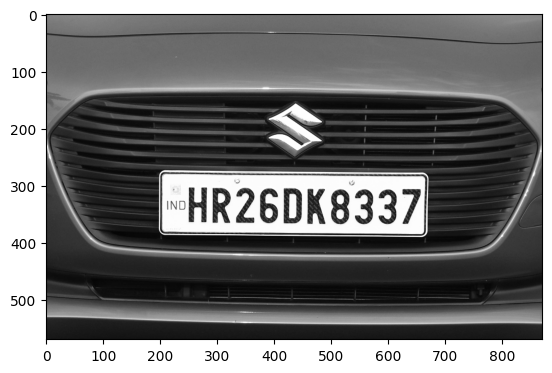

In [4]:
img = cv2.imread('test3.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

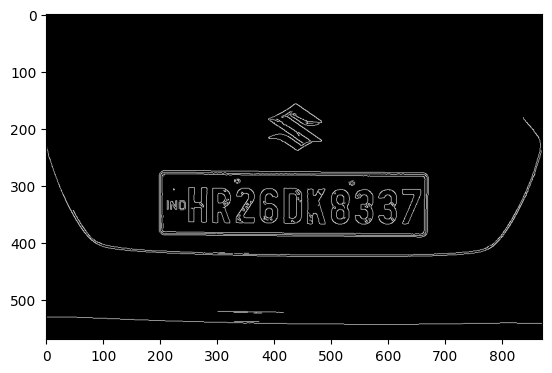

In [4]:
bfilter = cv2.bilateralFilter(gray, 221, 100, 100) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[198, 282]],

       [[206, 387]],

       [[669, 381]],

       [[663, 278]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

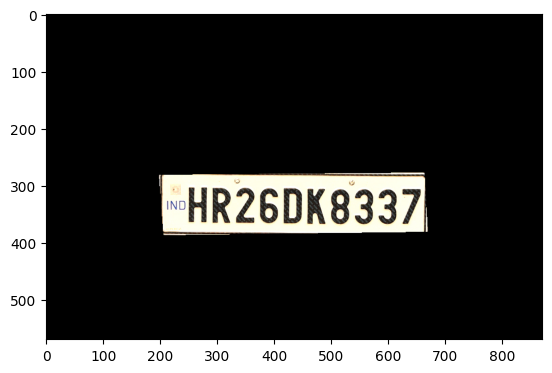

In [9]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

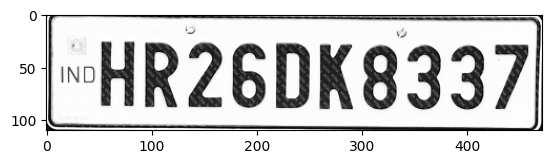

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\win10\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
C:\Users\win10\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\win10\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[8, 44], [54, 44], [54, 70], [8, 70]], 'INDI', 0.49826958775520325),
 ([[41, 11], [470, 11], [470, 109], [41, 109]],
  'HRZGDK8337|',
  0.4099427695559822)]

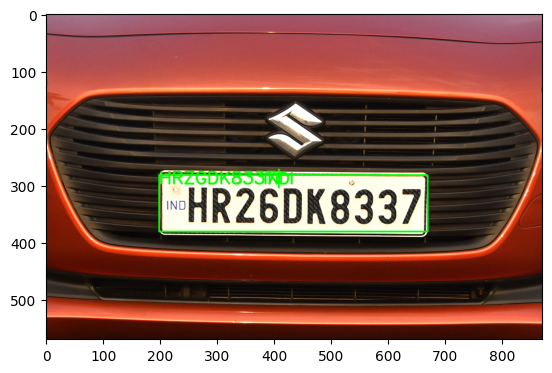

In [13]:
text = result[0][-2]
text1 = result[1][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text1, org=(approx[0][0][0], approx[1][0][1]-90), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.putText(img, text=text, org=(approx[2][0][1], approx[1][0][1]-90), fontFace=font, fontScale=.9, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [14]:
#copying the number recognized into a variable "number"
number=text1
print(number)

HRZGDK8337|


In [15]:
import datetime

In [16]:
#fetching current time 
h=datetime.datetime.now()
time=h.strftime("%H:%M:%S")
print(time)

22:48:52


In [17]:
#reading csv file to find entry log for recognized numberplate vehicle
d=pd.read_csv('test2.csv')
d

,number,time
0,CGO4HF2250,22:45:13
1,HRZGDK8337|,22:47:06


In [18]:
#converting col number to make it as new list to search recognized vehicle number 
l1=d['number'].tolist()
print(l1)

['CGO4HF2250', 'HRZGDK8337|']


In [19]:
#similarly to above step to create a list of time in same index order
l2=d['time'].tolist()
l2

['22:45:13', '22:47:06']

In [20]:
#searching the csv file to get the index of previously entered vechile number
for i in range(len(l1)):
    if l1[i]==number:
        temp=i

In [21]:
#fetching previous entry time  by using index of number 
temp1=l2[temp]

In [22]:
# ENTRY sepearating hours and assigning it into h variable
h1=temp1[0:2]
h1=int(h1)

In [23]:
#ENTRY separating and assigning minutes variable
m1=temp1[3:5]
m1=int(m1)

In [24]:
# ENTRY seaprating and assigning seconds variable
s1=temp1[6:]
s1=int(s1)

In [25]:
#exit hour variable
h2=time[0:2]
h2=int(h2)

In [26]:
#exit minutes variable
m2=time[3:5]
m2=int(m2)

In [27]:
#exit seconds variable
s2=time[6:]
s2=int(s2)

In [28]:
#subratcting hours
h3=h2-h1
m3=m2-m1
s3=s2-s1
if(m3>=60):
    h3=h3+1
    m3=0;

In [29]:
if(h3<0):
    h3=h3*(-1)
if(m3<0):
    m3=m3*(-1)
if(s3<0):
    s3=s3*(-1)

In [30]:
print("Entry time is")
print("%dhrs:%dmins:%dsec\n"%(h1,m1,s1))
print("Exit time is")
print("%dhrs:%dmins:%dsec\n"%(h2,m2,s2))
print("Total time parked is")
print("%dhrs:%dmins:%dsec\n"%(h3,m3,s3))

Entry time is
22hrs:47mins:6sec

Exit time is
22hrs:48mins:52sec

Total time parked is
0hrs:1mins:46sec



In [32]:
#Conditions to check parking fees
if(h3==0 and m3<30):
    print("charge is \t",'free')
if(h3==0 and m3>=30):
    print("charge is \t",20)
if(h3==1 and  m3<30):
    print("charge is \t",40)
if(h3==1 and  m3>=30):
    print("charge is \t",60)
if(h3==2 and  m3<30):
    print("charge is \t",80)
if(h3==2 and  m3>=30):
    print("charge is \t",100)
if(h3==3 and  m3<30):
    print("charge is \t",120)
if(h3==3 and  m3>=30):
    print("charge is \t",140)
if(h3==4 and  m3<30):
    print("charge is \t",160)
if(h3==4 and  m3>=30):
    print("charge is \t",180)
if(h3==5 and  m3<30):
    print("charge is \t",200)
if(h3==5 and  m3>=30):
    print("charge is \t",220)
if(h3==6 and  m3<30):
    print("charge is \t",240)
if(h3==6 and  m3>=30):
    print("charge is \t",260)
if(h3==7 and  m3<30):
    print("charge is \t",280)
if(h3==7 and  m3>=30):
    print("charge is \t",300)

charge is 	 free
